# Bibliotecas

In [6]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Dataset

O Fashion-MNIST é um conjunto de dados de imagens de artigos da Zalando, composto por um conjunto de treinamento com 60.000 exemplos e um conjunto de teste com 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza de 28x28, associada a um rótulo de 10 classes.

In [7]:
# carregar o dataset

dataset = keras.datasets.fashion_mnist
((imagens_treino, idenficacoes_treino), (imagens_teste, idenficacoes_teste)) = dataset.load_data()

# Explorando os dados

In [8]:
# visalizar os dados de treino

imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Retorna arrays referentes a cada imagem

In [9]:
# tamanho do conjunto de treino

len(imagens_treino)

60000

In [10]:
# shape

imagens_treino.shape

(60000, 28, 28)

Indica que temos 60 000 imagens, que são compostas de 28 linhas e 28 colunas (pixels).

In [11]:
# tamanho do conjunto de teste

len(idenficacoes_teste)

10000

In [12]:
idenficacoes_teste.shape
print(idenficacoes_teste.shape)

(10000,)


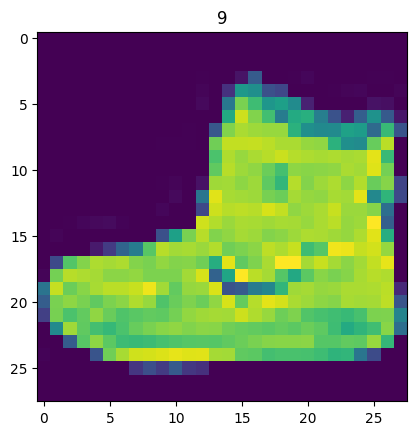

In [13]:
# visualizar uma imagem

plt.imshow(imagens_treino[0]);
plt.title(idenficacoes_treino[0]);

In [14]:
# visualizar as classes

idenficacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
# menor valor da classe

idenficacoes_treino.min()

np.uint8(0)

In [16]:
# maior valor da classe

idenficacoes_treino.max()

np.uint8(9)

In [17]:
total_de_identificacoes = 10

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

# Exibindo os dados

In [18]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

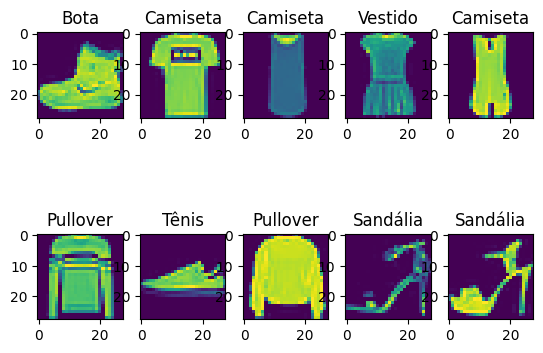

In [19]:
# exibir imagens e seus rótulos

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem]);
  plt.title(nomes_de_classificacoes[idenficacoes_treino[imagem]]);

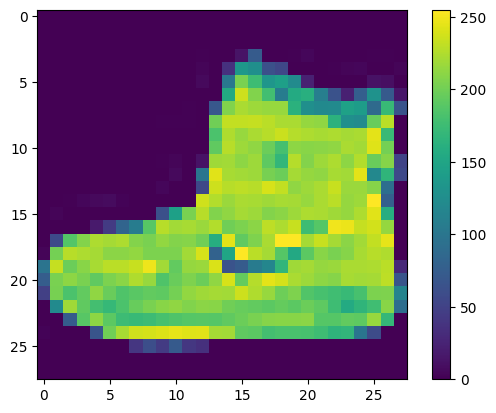

In [20]:
# cores

plt.imshow(imagens_treino[0]);
plt.colorbar()

O colorbar indica que os tons de cores variam de 0 a 255. Para melhorar o entendimento do modelo, podemos normalizar esse valor para o intervalo entre 0 e 1, divindo o conjunto de dados por 255.

In [21]:
# normalização das imagens de treino

imagens_treino = imagens_treino/float(255)

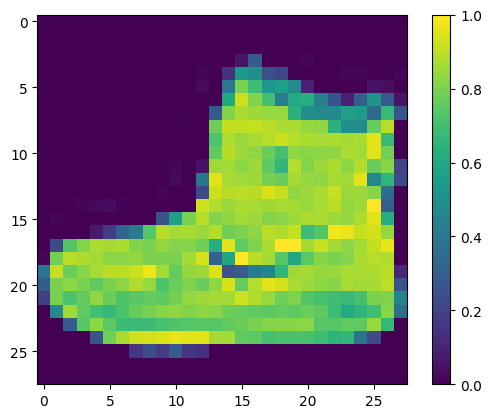

In [22]:
# imagem normalizada

plt.imshow(imagens_treino[0]);
plt.colorbar()

# Treinamento do modelo

In [23]:
# definição do modelo sequencial

modelo = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)), # camada de entrada
    keras.layers.Flatten(), # camada de redução de dimensionalidade
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # camada oculta
    keras.layers.Dropout(0.2), # camada de dropout
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # camada de saída
])


In [24]:
# compilação do modelo

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [25]:
# salvar histórico

historico = modelo.fit(imagens_treino, idenficacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7619 - loss: 0.6740 - val_accuracy: 0.8554 - val_loss: 0.3977
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8548 - loss: 0.3996 - val_accuracy: 0.8687 - val_loss: 0.3577
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8665 - loss: 0.3616 - val_accuracy: 0.8643 - val_loss: 0.3694
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8768 - loss: 0.3360 - val_accuracy: 0.8771 - val_loss: 0.3417
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8813 - loss: 0.3227 - val_accuracy: 0.8626 - val_loss: 0.3650
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8846 - loss: 0.3130 - val_accuracy: 0.8827 - val_loss: 0.3336
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8877 - loss: 0.2967 - val_accuracy: 0.8835 - val_loss: 0.3248
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8928 - loss: 0.2832 - 

In [26]:
# Resumo do modelo

sumario_modelo = modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

# Alterando pesos e vieses

## Pesos e viéses zerados

In [27]:
# Pesos da primeira camada dense

pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 8.0824152e-02,  2.5124902e-01, -3.0142197e-01, ...,
         2.8414570e-02,  5.7525616e-02, -5.2088588e-02],
       [ 3.4854621e-02, -5.9561938e-04,  2.6087961e-01, ...,
        -5.1593661e-02,  1.1241657e-01, -6.4906262e-02],
       [-6.4843491e-02,  4.3788230e-01,  1.2025379e-01, ...,
        -1.8715758e-02,  1.3748661e-01, -6.3541286e-02],
       ...,
       [-5.2045587e-02, -1.6873868e-01,  3.4901267e-01, ...,
         1.7276837e-02, -6.6702195e-02,  6.5744601e-02],
       [-1.4204444e-01, -3.5723202e-02, -1.8683924e-04, ...,
         9.3284622e-03,  1.8755703e-01, -9.3719162e-02],
       [-9.3927756e-02,  1.0548832e-01,  2.6555815e-01, ...,
        -5.1850289e-02, -2.3549426e-02, -5.0644722e-02]], dtype=float32)

In [28]:
# tamanho

pesos_camada_dense.shape

(784, 256)

In [29]:
# Vieses da primeira camada dense

vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-7.6022901e-02,  4.9277610e-01,  3.6883709e-01,  4.2084190e-01,
       -7.6650064e-03,  2.4389333e-01,  1.9032349e-01,  1.3273188e-01,
       -2.9920600e-02,  3.2945198e-01, -6.4462535e-02,  9.6731089e-02,
       -3.2847159e-02, -2.9804090e-01, -1.5068238e-02,  1.6163671e-01,
       -1.4632653e-01, -1.4080337e-01,  5.5394572e-01,  3.6673963e-01,
        3.9469561e-01,  5.7321566e-01,  3.4836035e-02, -2.2345048e-01,
       -1.0738774e-02,  1.3958989e-01,  3.0770588e-01,  2.4229674e-01,
       -1.1418713e-02,  7.1124084e-02, -1.4490091e-02,  5.1028007e-01,
        1.6603025e-03,  1.4011027e-01,  2.0470804e-01, -4.6314597e-02,
       -1.1326168e-01,  2.0472617e-01,  2.1619992e-01, -1.4666492e-02,
        1.4535236e-01,  4.4005758e-01,  1.7103523e-01, -7.0616484e-02,
        3.8064680e-01,  2.8324959e-01, -3.7995562e-01,  3.2598767e-01,
        4.8927274e-01,  1.7541381e-02,  6.4493679e-02, -1.8519665e-01,
        1.0981849e-01,  4.9798051e-01,  6.1965454e-02, -1.8274805e-02,
      

In [30]:
# tamanho

vieses_camada_dense.shape

(256,)

In [31]:
# Criando um array de 0 para zerar todos os pesos

pesos_camada_dense_zeros = np.zeros((784, 256))

In [32]:
# Criando um array de 0 para zerar todos os vieses

vieses_camada_dense_zeros = np.zeros((256,))

In [33]:
# Definindos os pesos e vieses zero

modelo.layers[1].set_weights([pesos_camada_dense_zeros, vieses_camada_dense_zeros])

In [34]:
# Verificando os pesos

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [35]:
# modelo com pesos e vieses zerados

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, idenficacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0988 - loss: 2.3161 - val_accuracy: 0.0983 - val_loss: 2.3030
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0983 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1006 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0968 - loss: 2.3028 - val_accuracy: 0.0983 - val_loss: 2.3028
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.0995 - val_loss: 2.3028
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1019 - loss: 2.3027 - val_accuracy: 0.0995 - val_loss: 2.3027
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.0983 - val_loss: 2.3028
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0996 - loss: 2.3026 - 

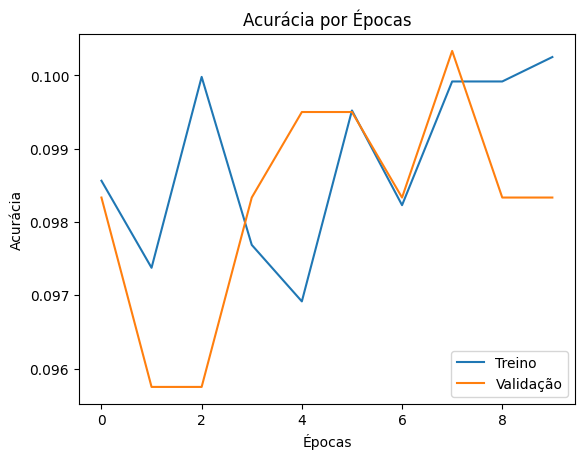

In [36]:
# gráfico de acurácia

plt.plot(historico.history['accuracy']);
plt.plot(historico.history['val_accuracy']);
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

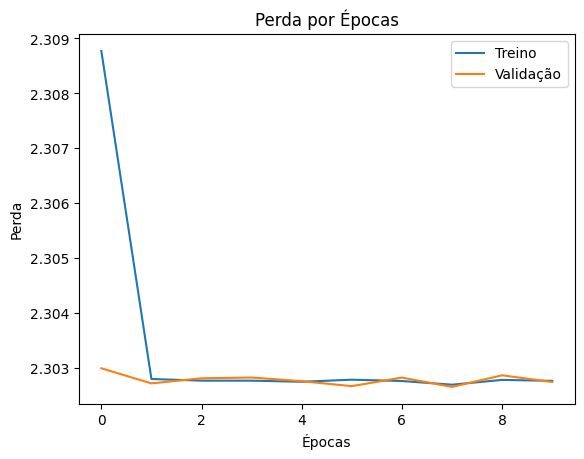

In [37]:
# gráfico de perda

plt.plot(historico.history['loss']);
plt.plot(historico.history['val_loss']);
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

Com pesos e vieses zerados fizeram o modelo apresentou resultados muito ruins ao decorrer das 10 épocas de treinamento.

## Pesos aleatórios

In [38]:
# gerar pesos aleatórios

pesos_camada_dense_aleatorios = np.random.rand(784, 256)
pesos_camada_dense_aleatorios

array([[0.32580209, 0.21259686, 0.25010099, ..., 0.31781104, 0.28591955,
        0.32622845],
       [0.88608493, 0.09285302, 0.93778617, ..., 0.35602777, 0.98492164,
        0.77602805],
       [0.93688397, 0.32997024, 0.61559259, ..., 0.47880854, 0.08949962,
        0.02487631],
       ...,
       [0.60683721, 0.34776275, 0.94371422, ..., 0.2291693 , 0.51629817,
        0.0173903 ],
       [0.58406408, 0.92068754, 0.25381773, ..., 0.06144224, 0.17875836,
        0.954239  ],
       [0.52580738, 0.46337021, 0.67446295, ..., 0.23260933, 0.86709568,
        0.76600658]])

In [39]:
# definir os pesos aleatórios

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

In [40]:
modelo.layers[1].get_weights()

[array([[0.3258021 , 0.21259686, 0.250101  , ..., 0.31781104, 0.28591955,
         0.32622844],
        [0.8860849 , 0.09285302, 0.93778616, ..., 0.35602778, 0.98492163,
         0.77602804],
        [0.936884  , 0.32997024, 0.6155926 , ..., 0.47880855, 0.08949962,
         0.02487631],
        ...,
        [0.6068372 , 0.34776273, 0.9437142 , ..., 0.2291693 , 0.5162982 ,
         0.0173903 ],
        [0.58406407, 0.92068756, 0.25381774, ..., 0.06144224, 0.17875837,
         0.954239  ],
        [0.5258074 , 0.4633702 , 0.674463  , ..., 0.23260933, 0.86709565,
         0.7660066 ]], dtype=float32),
 array([-7.6022901e-02,  4.9277610e-01,  3.6883709e-01,  4.2084190e-01,
        -7.6650064e-03,  2.4389333e-01,  1.9032349e-01,  1.3273188e-01,
        -2.9920600e-02,  3.2945198e-01, -6.4462535e-02,  9.6731089e-02,
        -3.2847159e-02, -2.9804090e-01, -1.5068238e-02,  1.6163671e-01,
        -1.4632653e-01, -1.4080337e-01,  5.5394572e-01,  3.6673963e-01,
         3.9469561e-01,  5.7321566

In [41]:
# treinar modelo com pesos aleatórios

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, idenficacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2944 - loss: 196.3787 - val_accuracy: 0.7262 - val_loss: 17.4945
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6095 - loss: 37.4938 - val_accuracy: 0.7328 - val_loss: 11.8228
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6908 - loss: 17.2559 - val_accuracy: 0.7399 - val_loss: 6.7114
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7243 - loss: 8.1692 - val_accuracy: 0.7958 - val_loss: 3.7304
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7499 - loss: 4.3316 - val_accuracy: 0.7598 - val_loss: 2.6423
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7683 - loss: 2.4730 - val_accuracy: 0.8079 - val_loss: 1.4800
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7949 - loss: 1.3445 - val_accuracy: 0.8194 - val_loss: 0.9376
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8141 - loss: 0.8

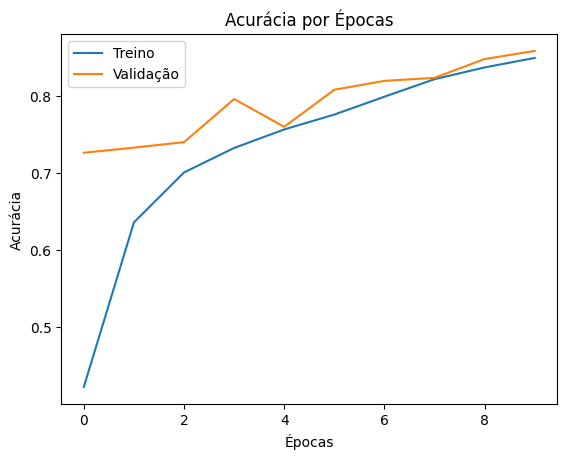

In [42]:
# gráfico de acurácia

plt.plot(historico.history['accuracy']);
plt.plot(historico.history['val_accuracy']);
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

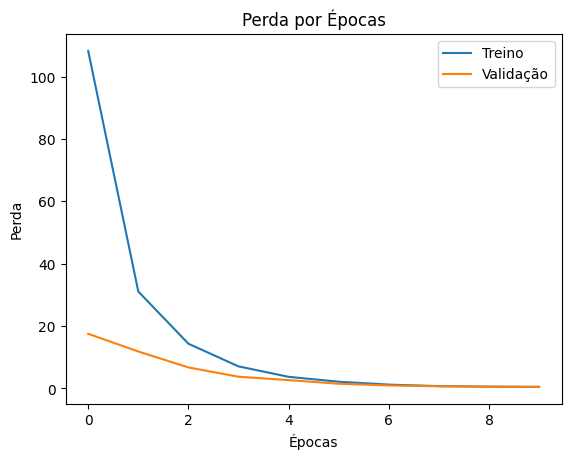

In [43]:
# gráfico de perda

plt.plot(historico.history['loss']);
plt.plot(historico.history['val_loss']);
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

# Ajuste de hiperparametros do otimizador

In [44]:
# compilar com learning_rate=0.002

adam = keras.optimizers.Adam(learning_rate=0.002)

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, idenficacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8407 - loss: 0.4801 - val_accuracy: 0.8564 - val_loss: 0.4615
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8538 - loss: 0.4178 - val_accuracy: 0.8652 - val_loss: 0.4103
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8656 - loss: 0.3815 - val_accuracy: 0.8653 - val_loss: 0.4041
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8698 - loss: 0.3613 - val_accuracy: 0.8643 - val_loss: 0.4090
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8765 - loss: 0.3457 - val_accuracy: 0.8727 - val_loss: 0.3712
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8746 - loss: 0.3379 - val_accuracy: 0.8776 - val_loss: 0.3617
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8829 - loss: 0.3196 - val_accuracy: 0.8762 - val_loss: 0.3679
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8863 - loss: 0.3085 - 

Modelo inicial: accuracy: 0.9104 - loss: 0.2352 - val_accuracy: 0.8828 - val_loss: 0.3472

Ao aumentar suavemente o LR, não alterou significativamente os resultados de treino e validação

In [45]:
# compilar com learning_rate=0.5 e batch_size=480

adam = keras.optimizers.Adam(learning_rate=0.5)

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, idenficacoes_treino, batch_size=480, epochs=10, validation_split=0.2)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1935 - loss: 262.1052 - val_accuracy: 0.1147 - val_loss: 2.3018
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1150 - loss: 2.2775 - val_accuracy: 0.1311 - val_loss: 2.2521
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1253 - loss: 2.2532 - val_accuracy: 0.1331 - val_loss: 2.2325
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1369 - loss: 2.2357 - val_accuracy: 0.1519 - val_loss: 2.2049
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1452 - loss: 2.2112 - val_accuracy: 0.1497 - val_loss: 2.2022
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1448 - loss: 2.2067 - val_accuracy: 0.1609 - val_loss: 2.1766
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1573 - loss: 2.1705 - val_accuracy: 0.1473 - val_loss: 2.1970
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1474 - loss: 2.1996 - val_ac

Aumentar o LR e o batch size fez o modelo treinar mais rápido porém apresentou resultados ruins

# Callback

A perda de validação estacionada pode indicar que chegamos a um mínimo local

In [46]:
# definir o modelo com callback

modelo = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)), # camada de entrada
    keras.layers.Flatten(), # camada de redução de dimensionalidade
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # camada oculta
    keras.layers.Dropout(0.2), # camada de dropout
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # camada de saída
])

adam = keras.optimizers.Adam(learning_rate=0.5)

parada = [keras.callbacks.EarlyStopping(monitor='val_loss')]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, idenficacoes_treino,
                       batch_size=480, epochs=10,
                       validation_split=0.2,
                       callbacks=parada)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1955 - loss: 355.9196 - val_accuracy: 0.2122 - val_loss: 2.0713
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2041 - loss: 2.0532 - val_accuracy: 0.1982 - val_loss: 2.0603
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1735 - loss: 2.1503 - val_accuracy: 0.1863 - val_loss: 2.0960


o modelo parou na 3 época pois o parâmetro monitorado não iria mais se alterar

In [47]:
# Callbacks - EarlyStop e Checkpoint

modelo = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)), # camada de entrada
    keras.layers.Flatten(), # camada de redução de dimensionalidade
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # camada oculta
    keras.layers.Dropout(0.2), # camada de dropout
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # camada de saída
])

adam = keras.optimizers.Adam(learning_rate=0.5)

parar_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
              keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.keras', monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, idenficacoes_treino,
                       batch_size=480, epochs=10,
                       validation_split=0.2,
                       callbacks=parar_cedo)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2026 - loss: 510.7284 - val_accuracy: 0.1232 - val_loss: 2.3113
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1299 - loss: 2.2921 - val_accuracy: 0.1470 - val_loss: 2.2500
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1473 - loss: 2.2086 - val_accuracy: 0.1601 - val_loss: 2.2111
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1784 - loss: 2.1295 - val_accuracy: 0.1587 - val_loss: 2.1780
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1846 - loss: 2.1278 - val_accuracy: 0.1513 - val_loss: 2.0860
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1878 - loss: 2.0924 - val_accuracy: 0.1957 - val_loss: 2.1266


o checkpoint vai salvar o modelo no ponto de melhor configuração encontrada

# Modelo Final

In [48]:
# definir o modelo

modelo = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)), # camada de entrada
    keras.layers.Flatten(), # camada de redução de dimensionalidade
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # camada oculta
    keras.layers.Dropout(0.2), # camada de dropout
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # camada de saída
])


In [49]:
# compilar o modelo

adam = keras.optimizers.Adam(learning_rate=0.001)

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [50]:
# salvar o histórico

historico = modelo.fit(imagens_treino, idenficacoes_treino,
                       epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7674 - loss: 0.6652 - val_accuracy: 0.8512 - val_loss: 0.4130
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8502 - loss: 0.4098 - val_accuracy: 0.8657 - val_loss: 0.3730
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8617 - loss: 0.3704 - val_accuracy: 0.8717 - val_loss: 0.3508
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8728 - loss: 0.3426 - val_accuracy: 0.8760 - val_loss: 0.3466
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8789 - loss: 0.3239 - val_accuracy: 0.8758 - val_loss: 0.3441
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8865 - loss: 0.3052 - val_accuracy: 0.8820 - val_loss: 0.3269
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8908 - loss: 0.2938 - val_accuracy: 0.8848 - val_loss: 0.3324
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8941 - loss: 0.2807 - 

# Avaliação de Treino e Validação

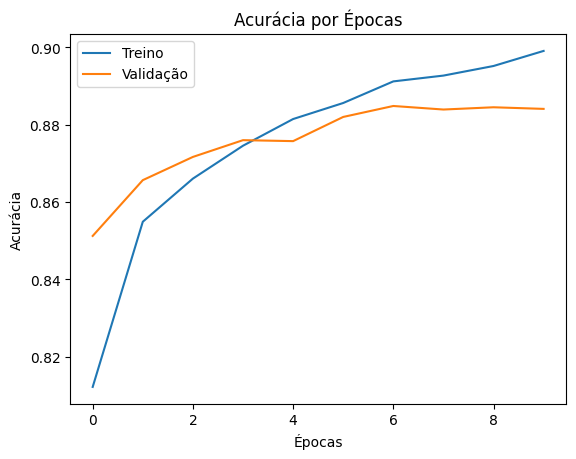

In [51]:
# acurácia do modelo

plt.plot(historico.history['accuracy']);
plt.plot(historico.history['val_accuracy']);
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

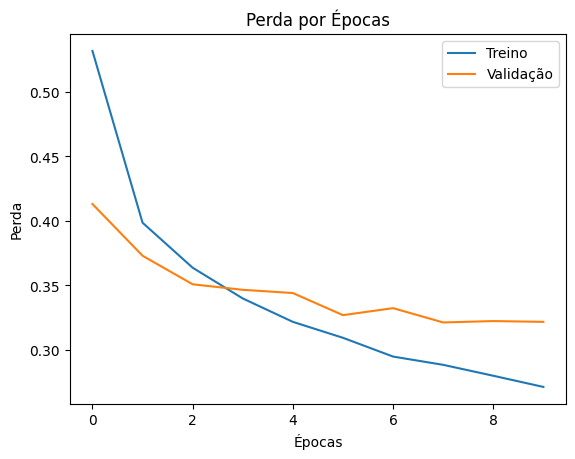

In [52]:
# perda do modelo

plt.plot(historico.history['loss']);
plt.plot(historico.history['val_loss']);
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

# Testar o Modelo

In [53]:
# predição

teste = modelo.predict(imagens_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [54]:
# resultado

teste[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [55]:
# comparar respostas

argmax = np.argmax(teste[0])
print(f'Resultado do Teste: {argmax}')
print(f'Numero da Identificação Correta: {idenficacoes_teste[0]}')

Resultado do Teste: 9
Numero da Identificação Correta: 9


In [56]:
print(f'Resultado do Teste: {np.argmax(teste[4])}')
print(f'Numero da Identificação Correta: {idenficacoes_teste[4]}')

Resultado do Teste: 6
Numero da Identificação Correta: 6


In [57]:
# evaluate

modelo.evaluate(imagens_teste, idenficacoes_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8581 - loss: 59.2544


[63.17478561401367, 0.8560000061988831]

In [58]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, idenficacoes_teste)
print(f'Perda do Teste: {perda_teste}')
print(f'Acurácia do Teste: {acuracia_teste}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8581 - loss: 59.2544
Perda do Teste: 63.17478561401367
Acurácia do Teste: 0.8560000061988831
